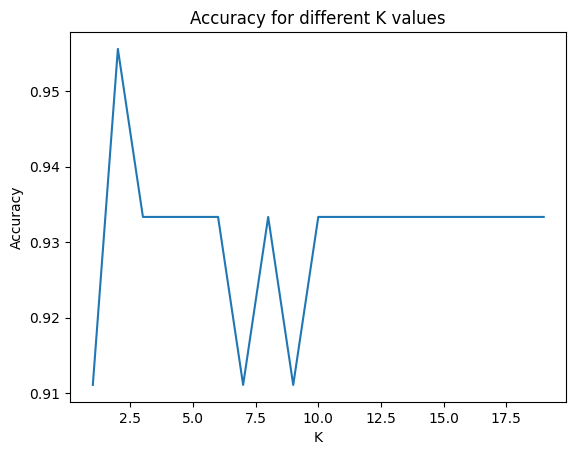

Optimal K: 2


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних
iris = load_iris()
X, y = iris.data, iris.target

# Перемішування даних
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

# Нормалізація даних
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Підбір оптимального K
k_values = range(1, 20)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Візуалізація результатів
plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different K values')
plt.show()

# Виведення оптимального K
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal K: {optimal_k}")